# VocalMood

## 1. Install the packages

In [3]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

## 2. Datasets

In [5]:
# Define the path based on your screenshot
DATA_PATH = "dataset/Actor_"

print(f"Checking path: {DATA_PATH}")

if os.path.exists(DATA_PATH):
    print("Path exists!")
    # list the first few Actor folders to be sure
    contents = os.listdir(DATA_PATH)
    print(f"Found {len(contents)} items inside. Examples: {contents[:5]}")
else:
    print("Path NOT found.")

Checking path: dataset/Actor_
✅ Path exists!
Found 26 items inside. Examples: ['Actor_16', 'Actor_11', 'Actor_18', 'Actor_20', 'Actor_21']


## 3. Visualizing

Testing with file: dataset/Actor_/Actor_16/03-01-05-01-02-01-16.wav


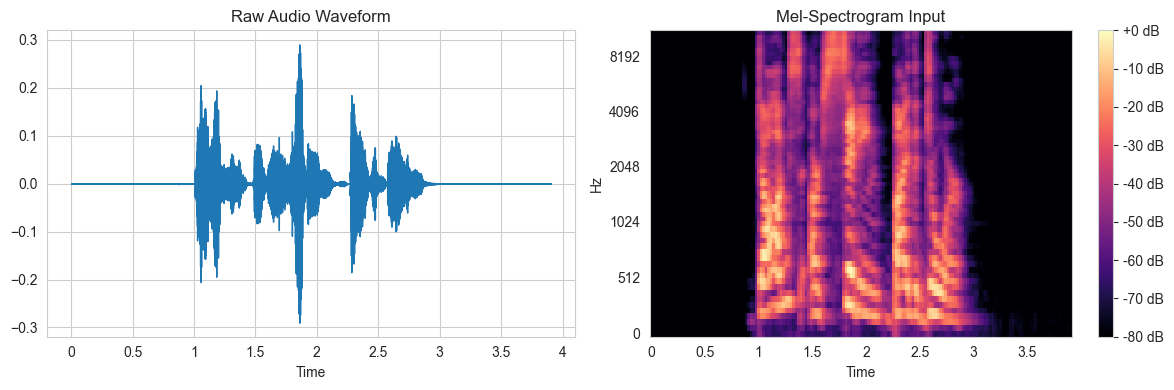

In [10]:
# Find one random wav file to test
sample_file = None
for root, dirs, files in os.walk(DATA_PATH):
    for file in files:
        if file.endswith(".wav"):
            sample_file = os.path.join(root, file)
            break
    if sample_file: break

if sample_file:
    print(f"Testing with file: {sample_file}")

    # Load audio with Librosa
    y, sr = librosa.load(sample_file)

    plt.figure(figsize=(12, 4))

    # 1. The Waveform (Time domain)
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title("Raw Audio Waveform")

    # 2. The Mel-Spectrogram (Frequency domain - What the AI sees)
    plt.subplot(1, 2, 2)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Mel-Spectrogram Input")

    plt.tight_layout()
    plt.show()
else:
    print("❌ No .wav files found yet. Check your folders.")